# Models

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import optuna


Let's try to figure out which lane every champ is usually played in based on the statistics throughout the game. To accomplish this task, I will try different classification models. The decision was based on the idea that each role should have a specific objective and play style throughout the game. 

In [2]:
df=pd.read_csv("./game_stats_df.csv")
df=df.drop(columns='Unnamed: 0')

In [3]:
X=df.drop(columns=['Position', 'win'])
y=df['Position']

In [4]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9855 entries, 0 to 9854
Columns: 105 entries, assists to wardTakedowns
dtypes: float64(10), int64(95)
memory usage: 7.9 MB
<class 'pandas.core.series.Series'>
RangeIndex: 9855 entries, 0 to 9854
Series name: Position
Non-Null Count  Dtype 
--------------  ----- 
9855 non-null   object
dtypes: object(1)
memory usage: 77.1+ KB


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

In [6]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded_df=pd.DataFrame(y_encoded, columns=['Position'])

In [8]:
print("LabelEncoder class mapping:", dict(zip(encoder.classes_, range(len(encoder.classes_)))))

LabelEncoder class mapping: {'BOTTOM': 0, 'JUNGLE': 1, 'MIDDLE': 2, 'TOP': 3, 'UTILITY': 4}


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.20, random_state=7)

In [10]:
def cm_plot(model,y_test, y_pred, encoder):

    labels=encoder.classes_
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=labels, yticklabels=labels)    
    plt.title(f"Confusion Matrix: {model}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

Accuracy: 0.7691527143581938
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       389
           1       0.76      0.75      0.75       377
           2       0.68      0.73      0.70       376
           3       0.69      0.67      0.68       407
           4       0.85      0.80      0.82       422

    accuracy                           0.77      1971
   macro avg       0.77      0.77      0.77      1971
weighted avg       0.77      0.77      0.77      1971



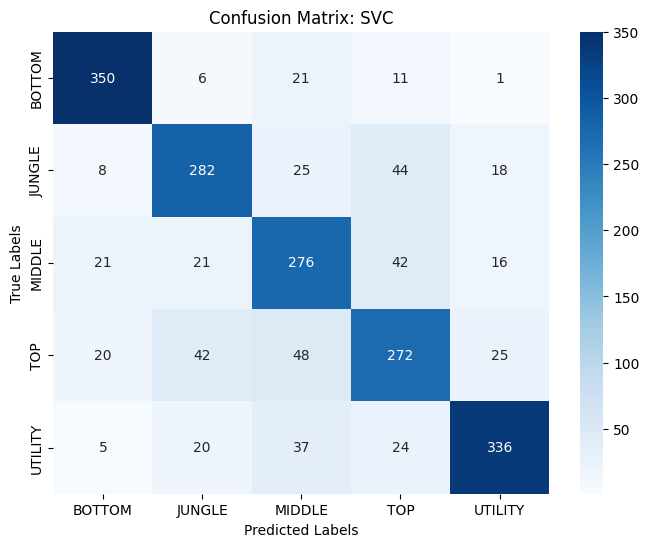

In [77]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear'))
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm_plot('SVC', y_test, y_pred,encoder)

Accuracy: 0.7300862506341959
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       389
           1       0.75      0.75      0.75       377
           2       0.67      0.67      0.67       376
           3       0.64      0.61      0.63       407
           4       0.75      0.79      0.77       422

    accuracy                           0.73      1971
   macro avg       0.73      0.73      0.73      1971
weighted avg       0.73      0.73      0.73      1971



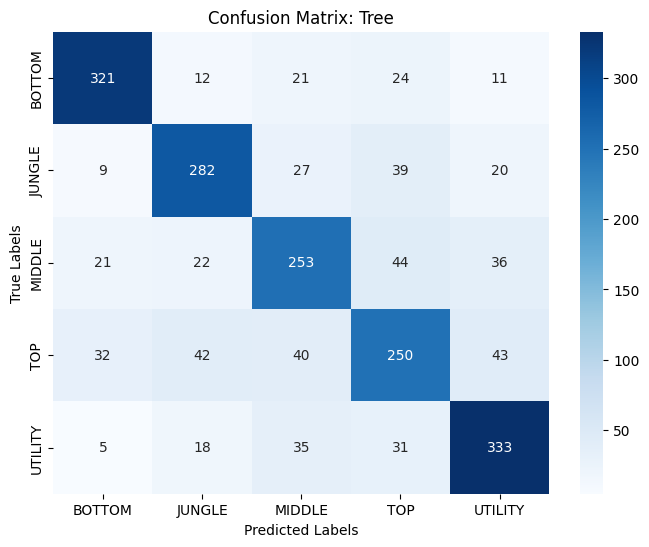

In [78]:
tree= DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
cm_plot('Tree', y_test, y_pred_tree,encoder)

Accuracy: 0.7843734145104008
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       389
           1       0.84      0.72      0.78       377
           2       0.68      0.74      0.71       376
           3       0.72      0.72      0.72       407
           4       0.88      0.82      0.85       422

    accuracy                           0.78      1971
   macro avg       0.79      0.78      0.78      1971
weighted avg       0.79      0.78      0.78      1971



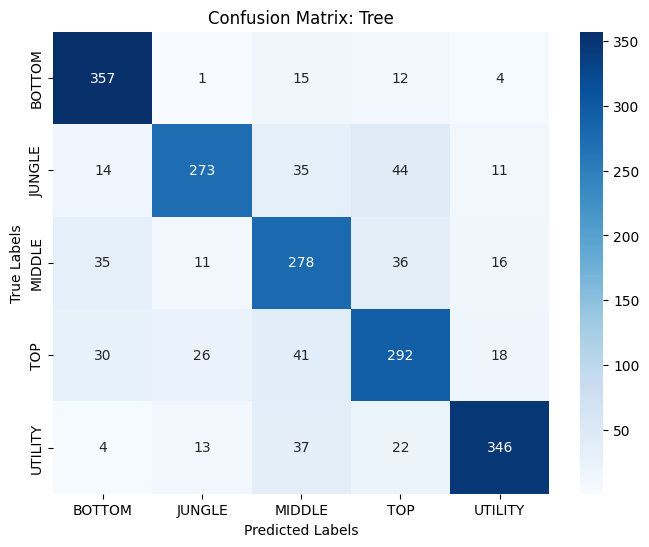

In [79]:
forest= RandomForestClassifier(n_estimators=100,max_depth=10, random_state=7)
forest.fit(X_train,y_train)
y_pred_forest = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))
cm_plot('Tree', y_test, y_pred_forest,encoder)

Accuracy: 0.7072552004058853
              precision    recall  f1-score   support

           0       0.76      0.91      0.82       389
           1       0.76      0.72      0.74       377
           2       0.59      0.71      0.64       376
           3       0.65      0.49      0.56       407
           4       0.79      0.72      0.75       422

    accuracy                           0.71      1971
   macro avg       0.71      0.71      0.70      1971
weighted avg       0.71      0.71      0.70      1971



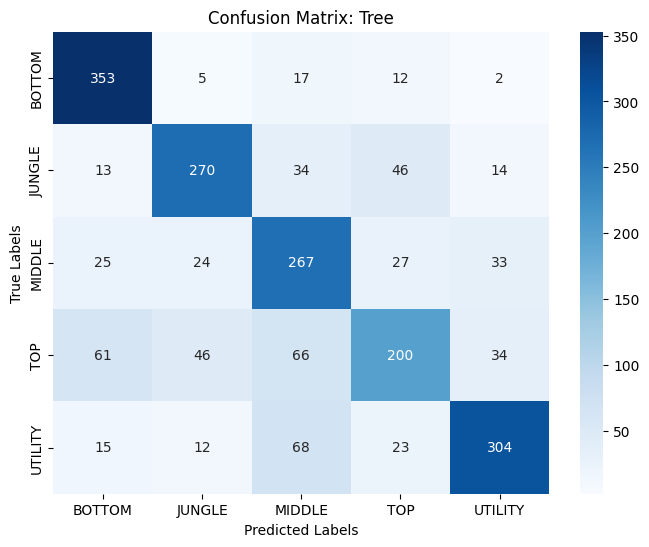

In [80]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
cm_plot('Tree', y_test, y_pred_knn,encoder)

Accuracy: 0.7833587011669203
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       389
           1       0.78      0.74      0.76       377
           2       0.69      0.75      0.72       376
           3       0.71      0.71      0.71       407
           4       0.85      0.82      0.84       422

    accuracy                           0.78      1971
   macro avg       0.78      0.78      0.78      1971
weighted avg       0.79      0.78      0.78      1971



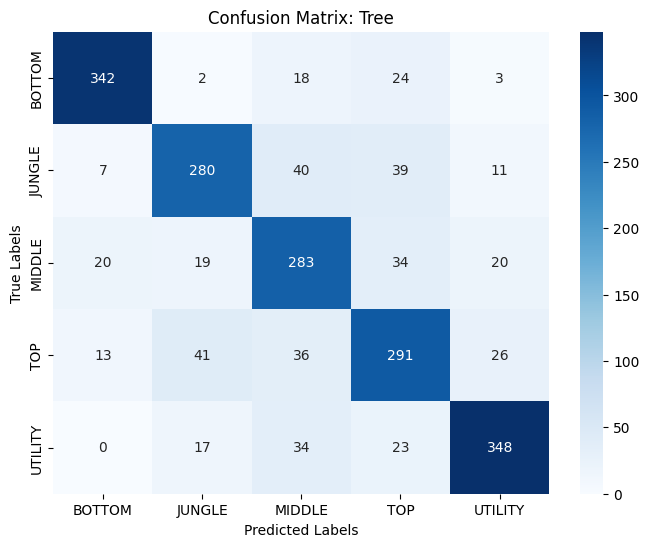

In [81]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))
cm_plot('Tree', y_test, y_pred_gbc,encoder)

Now I use Optuna to try different combinations of hyperparameters for the 3 models with the highest accuracy. 

[I 2024-12-26 20:43:21,960] A new study created in memory with name: no-name-32db547e-469b-4dae-b089-c268280995b3
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-26 20:43:51,268] Trial 0 finished with value: 0.7676306443429731 and parameters: {'C': 2.6052826512647123, 'tol': 4.166962238112375e-05}. Best is trial 0 with value: 0.7676306443429731.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna

Best Hyperparameters: {'C': 0.03281477407262626, 'tol': 0.00019148079017293718}
Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       389
           1       0.80      0.74      0.77       377
           2       0.68      0.74      0.71       376
           3       0.71      0.68      0.70       407
           4       0.85      0.81      0.83       422

    accuracy                           0.78      1971
   macro avg       0.78      0.78      0.78      1971
weighted avg       0.78      0.78      0.78      1971



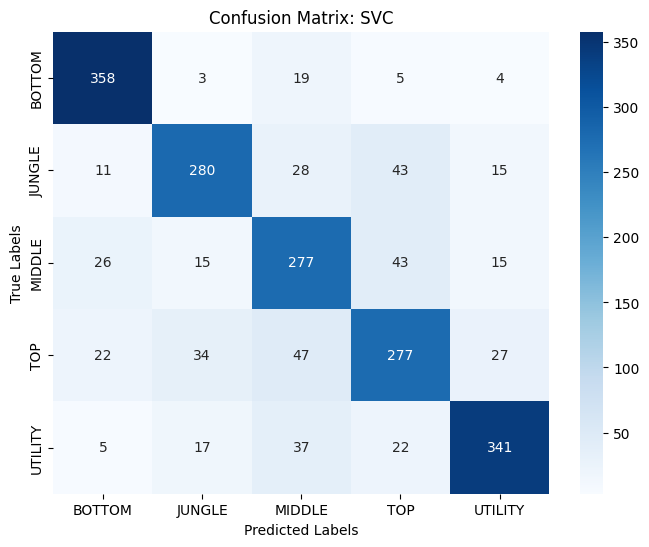

In [83]:
def objective(trial):
    """
    Objective function for Optuna to optimize hyperparameters for SVC.
    """
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    tol = trial.suggest_loguniform('tol', 1e-5, 1e-1)
    
    clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=C, tol=tol))
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
print("Best Hyperparameters:", best_params)

clf = make_pipeline(StandardScaler(), SVC(kernel='linear', **best_params))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm_plot('SVC', y_test, y_pred, encoder)

[I 2024-12-26 22:18:52,255] A new study created in memory with name: no-name-a78c79bc-9ceb-4235-afcd-0b39ac607cdd
[I 2024-12-26 22:18:56,825] Trial 0 finished with value: 0.7955352612886859 and parameters: {'n_estimators': 216, 'max_depth': 50, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.7955352612886859.
[I 2024-12-26 22:18:58,554] Trial 1 finished with value: 0.7950279046169457 and parameters: {'n_estimators': 81, 'max_depth': 37, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.7955352612886859.
[I 2024-12-26 22:19:03,438] Trial 2 finished with value: 0.7985794013191273 and parameters: {'n_estimators': 217, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.7985794013191273.
[I 2024-12-26 22:19:05,271] Trial 3 finished with value: 0.7970573313039067 and parameters: {'n_estimators': 83, 'max_depth': 39, 'min_samples_split': 16, 'min_samples_leaf': 5}. Best is trial 2 with value:

Best Hyperparameters: {'n_estimators': 72, 'max_depth': 50, 'min_samples_split': 7, 'min_samples_leaf': 1}
Accuracy: 0.8158295281582952
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       389
           1       0.84      0.77      0.80       377
           2       0.74      0.78      0.76       376
           3       0.76      0.76      0.76       407
           4       0.87      0.85      0.86       422

    accuracy                           0.82      1971
   macro avg       0.82      0.82      0.81      1971
weighted avg       0.82      0.82      0.82      1971



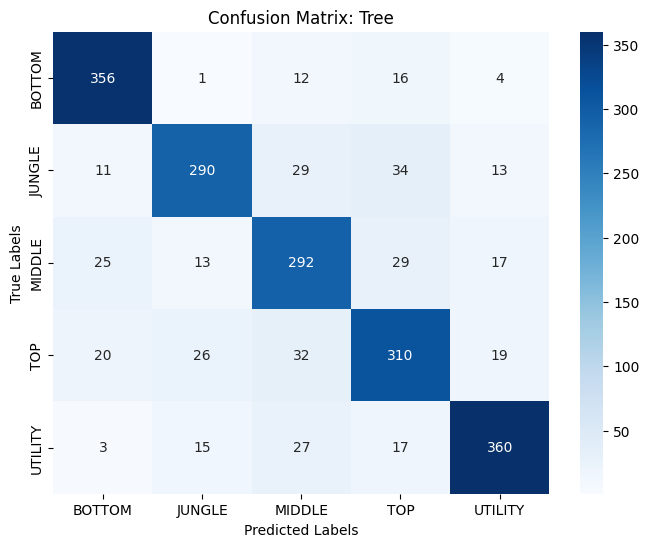

In [84]:
def objective(trial):
    """
    Objective function for Optuna to optimize hyperparameters for RandomForestClassifier.
    """
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    forest = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=7
    )
    
    forest.fit(X_train, y_train)
    
    y_pred_forest = forest.predict(X_test)
    return accuracy_score(y_test, y_pred_forest)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
print("Best Hyperparameters:", best_params)

forest = RandomForestClassifier(**best_params, random_state=7)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))
cm_plot('Tree', y_test, y_pred_forest, encoder)

[I 2024-12-26 22:24:00,159] A new study created in memory with name: no-name-a44f1182-6f18-4bb6-8f8a-1e02cd393b13
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-26 22:26:28,154] Trial 0 finished with value: 0.8650431253170979 and parameters: {'n_estimators': 190, 'learning_rate': 0.1734629217244779, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8650431253170979.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-26 22:32:28,423] Trial 1 finished with value: 0.8691019786910198 and parameters: {'n_estimators': 292, 'learning_rate': 0.08010187794313987, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 1 with value:

Best Hyperparameters: {'n_estimators': 264, 'learning_rate': 0.30579022386082677, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 8}
Accuracy: 0.8756976154236428
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       389
           1       0.89      0.87      0.88       377
           2       0.83      0.86      0.85       376
           3       0.83      0.82      0.82       407
           4       0.91      0.88      0.89       422

    accuracy                           0.88      1971
   macro avg       0.88      0.88      0.88      1971
weighted avg       0.88      0.88      0.88      1971



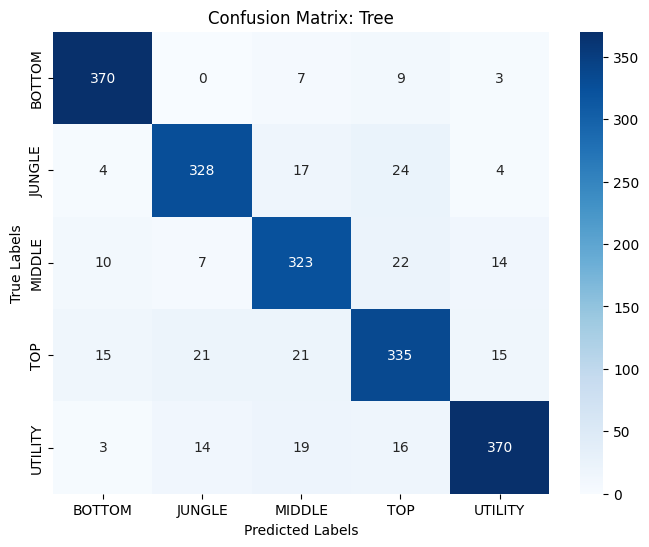

In [85]:
def objective(trial):

    # Define hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 1.0)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    gbc = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    gbc.fit(X_train, y_train)
    
    y_pred_gbc = gbc.predict(X_test)
    return accuracy_score(y_test, y_pred_gbc)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
print("Best Hyperparameters:", best_params)

gbc = GradientBoostingClassifier(**best_params, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))
cm_plot('GBC', y_test, y_pred_gbc, encoder)

To avoid overfitting, now I'll do a cross validation test with the hyperparameters obtained for each model.  

In [15]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=0.03281477407262626, tol=0.00019148079017293718 ))
cv_scores = cross_val_score(clf, X, y_encoded, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))

Cross-validation scores: [0.75951294 0.73262303 0.78183663 0.76306443 0.79299848]
Mean CV accuracy: 0.7660071029934044
Standard deviation of CV accuracy: 0.02070960081212134


In [14]:
forest = RandomForestClassifier(n_estimators= 72, max_depth= 50, min_samples_split= 7, min_samples_leaf= 1, random_state=7)
cv_scores = cross_val_score(forest, X, y_encoded, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))


Cross-validation scores: [0.80010147 0.78234399 0.82090309 0.81227803 0.80872653]
Mean CV accuracy: 0.8048706240487062
Standard deviation of CV accuracy: 0.013091768481933


In [ ]:
gbc = GradientBoostingClassifier(n_estimators= 264, learning_rate= 0.30579022386082677, max_depth= 8, min_samples_split= 9, min_samples_leaf= 8, random_state=7)

cv_scores = cross_val_score(gbc, X, y_encoded, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation of CV accuracy:", np.std(cv_scores))

Cross-validation scores: [0.87772704 0.84018265 0.88280061 0.87519026 0.8746829 ]
Mean CV accuracy: 0.8701166920345003
Standard deviation of CV accuracy: 0.015240980907574704


After checking for overfitting, the winner model is the Gradient Boosting Classifier, with an average of 87% accuracy. This model can help predict the lane in which each champion is played. The lane with the most misclassified champs was top lane, and the one with the least was bottom. There is a simple explanation for both of these cases. The top lane players tend to play with champs that are not designed to be played in this specific lane, as such, there is a lot of inconsistency in the gameplay and statistics generated by these players, meanwhile, bottom or ADC (Attack Damage Carry) tends to have a clearly defined play style with a limited amount of champions played in this role, leaving little room to experiment with different play styles. 